In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import os

os.chdir('C:/Users/user/Downloads/')

### Бинарная классификация

Для задачи бинарной классификации используются данные titanic (https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5). Посмотрим на данные:

In [38]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Проверим на наличие пропущенных значений:

In [39]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Для анализа потребуется столбец `Age`, поэтому заполним пропущенные значения медианой всех значений признака:

In [ ]:
titanic_data['Age'].fillna((titanic_data['Age'].median()), inplace = True)

Преобразуем категориальный признак `Sex` в числовой:

In [51]:
attype = {'female' : 0, 'male': 1}
titanic_data['sex_new'] = titanic_data['Sex'].map(attype)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,0


In [74]:
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Fare', 'sex_new']]
y = titanic_data[['Survived']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

Обучение модели классификации будем производить с помощью агоритма Random forest (Случайный лес)

In [76]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=700, min_samples_split=10, min_samples_leaf=1, 
                             max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

Вычислим значение показателя AUC - площадь области под RОС-кривой:

In [77]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
auc

0.8821190476190477

Можно сделать вывод, что полученная модель классификации надежна.

Теперь построим саму ROC-кривую:

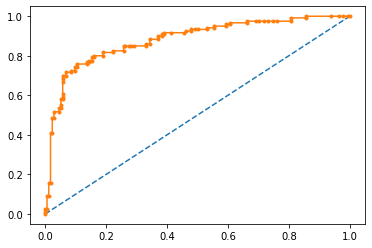

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Многоклассовая классификация 

Для задачи многоклассовой классификации будем использовать данные ириса.

In [81]:
iris = pd.read_csv('iris.csv')
sp = {'Iris-setosa' : 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_new'] = iris['Species'].map(sp)

X = iris.iloc[:, 1:5]
y = iris.iloc[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

In [88]:
accuracy_score(KNN_prediction, y_test)

0.98

In [91]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(KNN_prediction, y_test))  

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


### Задача регрессии

Для задачи регрессии используем данные `Ecommerce Customer Device Usage` (https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage)

Посмотрим на данные:

In [4]:
ecom_data = pd.read_csv("Ecommerce Customers.csv")
#удалим персональную информацию, хотя данные и в открытом доступе
ecom_data = ecom_data.drop(columns=['Email', 'Address'])
ecom_data.head(10)

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [5]:
ecom_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Посмотрим на Heatmap данных:

(5.0, 0.0)

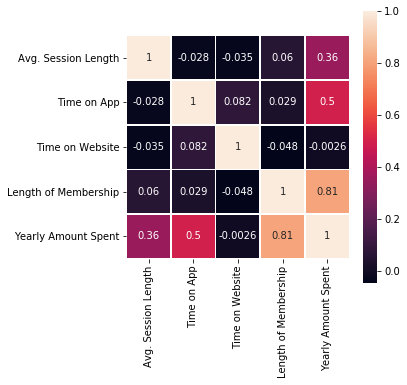

In [115]:
ecom_kor = ecom_data.corr()

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(ecom_kor, annot=True, linewidths=.5, square=True, ax= ax)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Наибольшая связь у `Length of Membership`(Продолжительность членства) и `Yearly Amount Spent`(Затраченная годовая сумма) - 81%. Время, проведенное в приложении (`Time on App`) также имеет влияние, но не такое сильное (50%). 

Проверим пропущенные значения:

In [116]:
ecom_data.isnull().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [34]:
y = ecom_data["Yearly Amount Spent"].copy()
X = ecom_data[[ "Length of Membership", "Time on App", "Time on Website", 'Avg. Session Length']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state = 465, shuffle=True)

In [7]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
ecom_data_pred = results.predict()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     5748.
Date:                 Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                         12:03:55   Log-Likelihood:                -1384.1
No. Observations:                  375   AIC:                             2778.
Df Residuals:                      370   BIC:                             2798.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1061.2099     26.612    -39.877      0.000   -1113.540   -1008.880
Length of Membership    61.6891      0.505    122.042      0.000      60.695      62.683
Time on App             38.7269      0.525     73.761      0.000      37.695      39.759
Time on Website          0.8971      0.510      1.759      0.079      -0.106       1.900
Avg. Session Length     25.4937      0.501     50.926      0.000      24.509      26.478
==============================================================================
Omnibus:                        1.052   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.857
Skew:                           0.105   Prob(JB):                        0.651
Kurtosis:                       3.104   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент детерминации равен 0.984, следовательно, можно сделать вывод, что построенная модель регрессии достаточно хорошая.

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

m = mean_squared_error(y_test, y_pred)
sqrt(m)

10.625340204003276

Среднеквадратичная ошибка RMSE = 10.6, что намного меньше 10% от среднего значения затраченной годовой суммы (499), поэтому модель надежна и может сделать достаточно хорошие прогнозы.

Визуализируем диаграмму рассеяния для построенной модели:

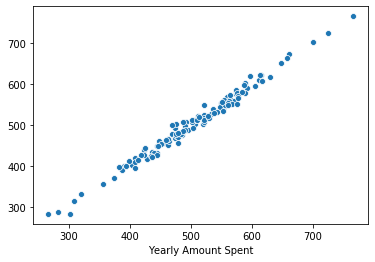

In [39]:
sns.scatterplot(y_test, y_pred)